# Lesson 7

## Алгоритм kNN

Реализуем алгоритм kNN с помощью Python.

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Загрузим один из "игрушечных" датасетов из sklearn.

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

Разделим выборку на обучающую и тестовую

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

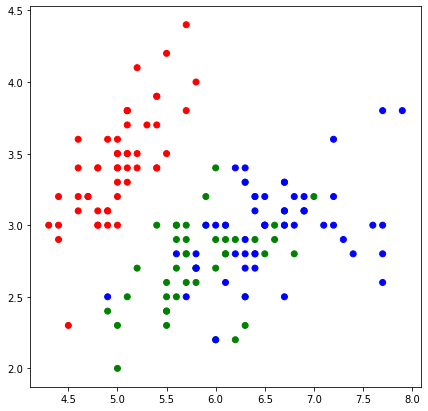

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [5]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

Реализуем алгоритм поиска k ближайших соседей.

In [6]:
def knn(x_train, y_train, x_test, k, weights=None, a=0.01):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        if weights=='distance':
            for d in sorted(test_distances)[0:k]:
                classes[d[1]] += 1/(d[1] + a)**2
        
        if weights=='number':
            for d in sorted(test_distances)[0:k]:
                for i in range(k):
                    classes[d[1]] += 1/(i+1)
        else: 
            for d in sorted(test_distances)[0:k]:
                classes[d[1]] += 1
        
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

Напишем функцию для вычисления точности

In [7]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

Построим график распределения классов.

In [8]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [9]:
k = 5

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.867


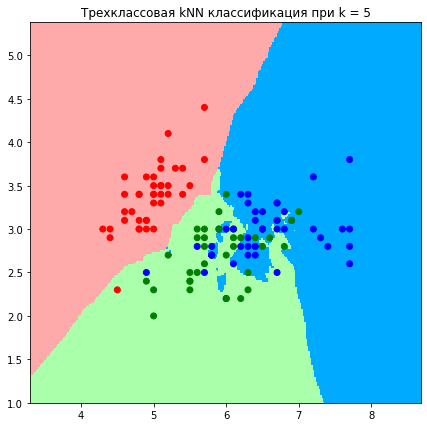

In [10]:
get_graph(X_train, y_train, k)

In [11]:
k = 5

y_pred = knn(X_train, y_train, X_test, k, weights='distance')

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.733


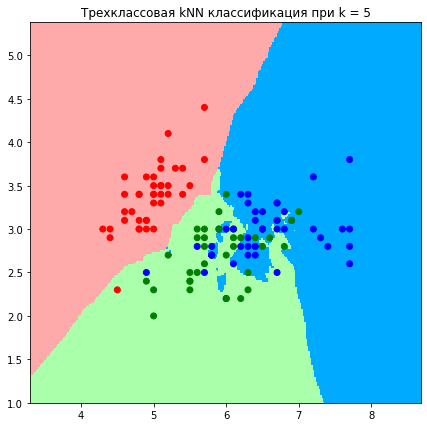

In [12]:
get_graph(X_train, y_train, k)

In [13]:
k = 5

y_pred = knn(X_train, y_train, X_test, k, weights='number')

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.867


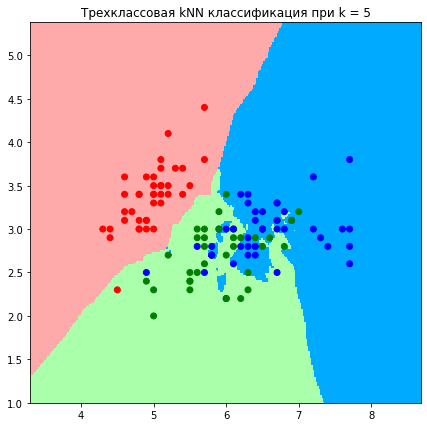

In [14]:
get_graph(X_train, y_train, k)

In [15]:
# добавление весов по расстоянию уменьшает качество модели, по номеру - такое же качество как без весов. 
# очевидно, это говорит о том, что неверно выбраны гипперпараметры для модели по весам + плоскости очень сложные, 
# что говорит о переобучении. попробуем изменить a и увеличить количество k

In [16]:
k = 10

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.833


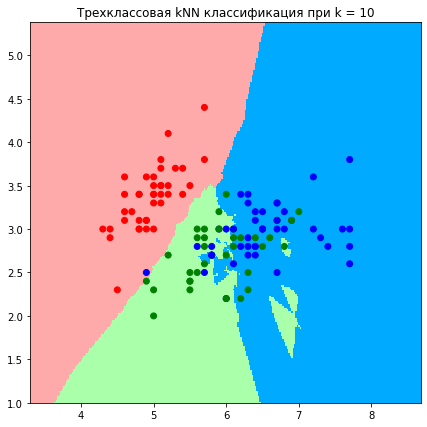

In [17]:
get_graph(X_train, y_train, k)

In [ ]:
# качество модели без весов упало, а плоскость усложнилась и стала более переобученной, для такой модели 
# оптимальное k будет лежать между 5 и 10 

In [19]:
k = 10

y_pred = knn(X_train, y_train, X_test, k, weights='distance', a=0.001)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.800


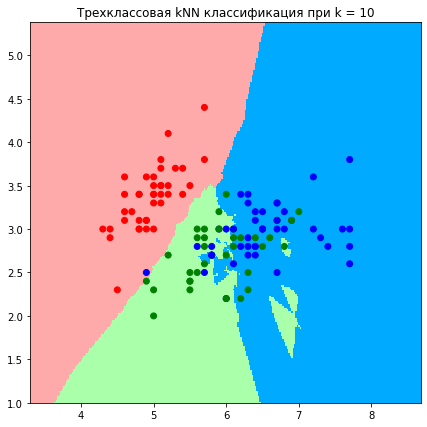

In [20]:
get_graph(X_train, y_train, k)

In [ ]:
# точность модели с дистанцией улучшилась, что говорит о том, что мы на правильном пути с настройкой 
# гипперпараметра a, но плоскость так же усложнилась, что значит, что оптимальное k лежит ниже 

In [21]:
k = 10

y_pred = knn(X_train, y_train, X_test, k, weights='number')

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.833


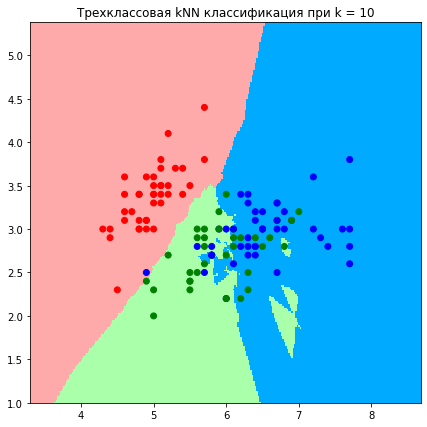

In [22]:
get_graph(X_train, y_train, k)

In [23]:
# модель с весами по номеру не показывает отличие от модели без весов
# попробуем использовать k выше 5, но ниже 10. возьмем 7, и дополнительно еще уменьшим параметр a 

In [24]:
k = 7

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 7: 0.800


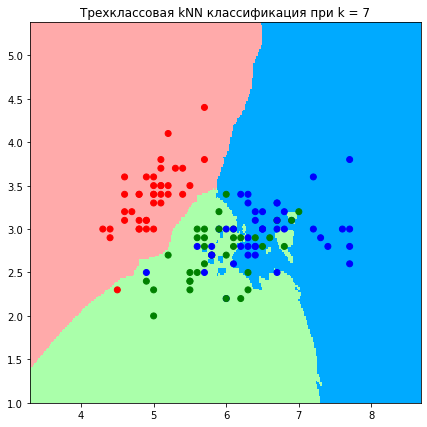

In [25]:
get_graph(X_train, y_train, k)

In [26]:
# качество модели без весов ниже, чем при k = 5, возможно для такой модели k должно быть ниже 5

In [27]:
k = 7

y_pred = knn(X_train, y_train, X_test, k, weights='distance', a=0.0001)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 7: 0.800


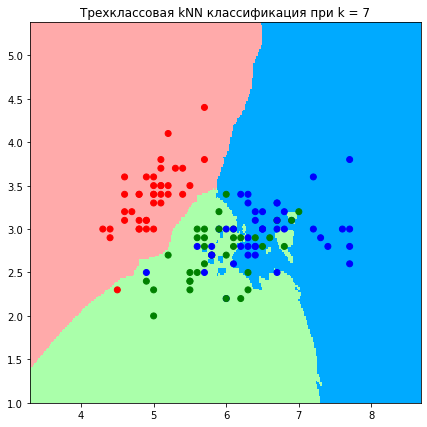

In [28]:
get_graph(X_train, y_train, k)

In [29]:
# при уменьшении a точность алгоритмов сравнялась, но значимых отличий в строении гипперплоскости нет 

In [30]:
k = 7

y_pred = knn(X_train, y_train, X_test, k, weights='number')

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 7: 0.800


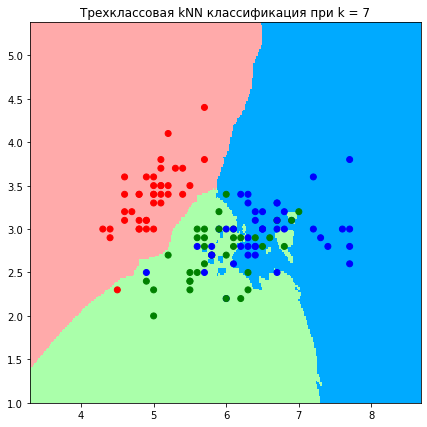

In [31]:
get_graph(X_train, y_train, k)

In [32]:
# все модели показали одинаковый результат при k = 7, а плоскость получилась слишком сложной. попробуем 
# установить k = 4

In [33]:
k = 4

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 4: 0.833


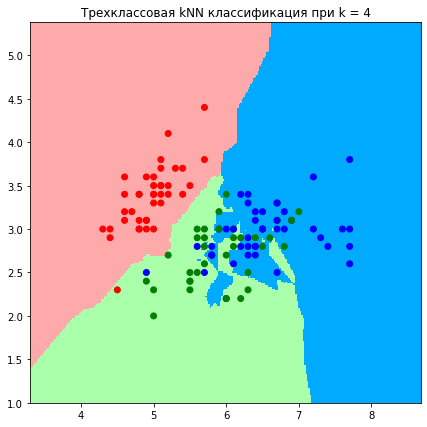

In [34]:
get_graph(X_train, y_train, k)

In [35]:
#  точность для модели без весов ниже чем при k = 5, значит это было оптимальное значение

In [36]:
k = 4

y_pred = knn(X_train, y_train, X_test, k, weights='distance', a=0.0001)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 4: 0.733


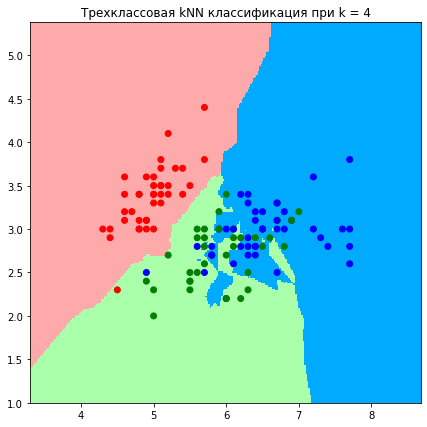

In [37]:
get_graph(X_train, y_train, k)

In [38]:
#  при использовании весов по расстоянию качество модели снова ниже, значит оптимальное k для такой модели = 7

In [39]:
k = 4

y_pred = knn(X_train, y_train, X_test, k, weights='number')

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 4: 0.833


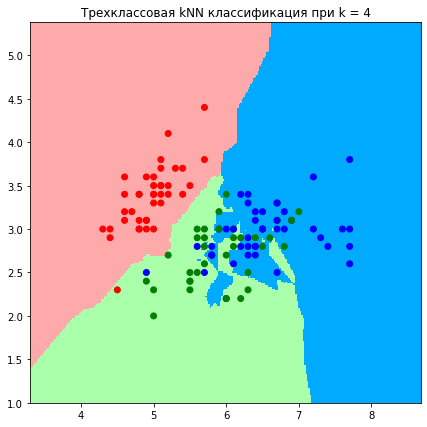

In [40]:
get_graph(X_train, y_train, k)

In [ ]:
# модель с весом по номеру не показывает отличий от основной модели